<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data Visualization</center>

# Challenge S3: Tipos de Gráficos
## Caso Estaciones de Alquileres de Bicicletas Chicago


* Objetivo

* Visión general del problema.  

* Obtención de los datos  
    * Tratamiento de fechas  
    * Función Grouper  
* P1 -RELACIONES TEMPORALES  
    * Pandas Pivot Table  
    * Utilizamos figure   
* Q1 ¿En qué agregado de fecha queda más intuitiva la información?  
* P2 -HISTOGRAMA  
* Q2  Visualizamos el Histograma de alquileres y el Histograma de temperaturas  
* P3 -ALQUILER POR HORAS Y DÍAS  
* P4 -RELACIÓN ENTRE CNT Y TMP  
   * P4.1 Utilizando total de meses.  
   * P4.2 Regresion lineal  
* P5-PARTE DE UN TODO  

# Objetivo

El objetivo de este worksheet es prácticar sobre los principiales tipos de gráficos que podemos utilizar en Data Science para ** analizar la relación entre nuestros datos**  y **responder preguntas** . 

No nos olvidemos que en Data Visualization vamos a buscar:

* **Explorar**
* **Explicar**

nuestros datos

Las relaciones sobre las que vamos a trabajar son:

* Relaciones Temporales
* Ranking
* Parte de un Todo
* Desviación
* Correlación
* Comparación




En la página web https://matplotlib.org/ tenéis un completo tutorial con ejemplos y manuales donde podréis profundizar y convertiros en auténticos master en matplotlib.

Podemos hacer tantos gráficos que lo mejor es tener a mano la galería y lo que podemos hacer.

In [1]:
#from IPython.display import HTML
#HTML('<iframe src="http://matplotlib.org/gallery.html#pylab_examples" width="800" height="600"></iframe>')

# Visión general del problema.


La ciudad de Chicago tiene un problema con su servicio de alquileres de bicicleta mas de un ** 20% ** de las estaciones 
se encuentra sin bicicletas cuando un consumidor se acerca a alquilar una bicicleta.

Nuestro objetivo es explorar y entender la demanda de bicicletas para conociendo el problema intentar solucionarlo.



In [1]:
## importing the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Obtención de los datos

Antes de importar los datos vamos a definir una serie de parámetros que aplicaremos a todos los gráficos. 

Estos pueden ser reescritos en cada gráfico. 



In [2]:
# Set some parameters to apply to all plots. These can be overridden
# in each plot if desired

# Plot size to 14" x 7"
plt.rc('figure', figsize = (8, 5))
# Font size to 14
plt.rc('font', size = 14)
# Do not display top and right frame lines
plt.rc('axes.spines', top = False, right = False)
# Remove grid lines
plt.rc('axes', grid = False)
# Set backgound color to white
plt.rc('axes', facecolor = 'white')


Esta vez va a ser fácil, vamos a importar los datos de un fichero csv, utilizaremos la función read_csv que nos proporciona la libreria de pandas.


In [3]:
#añadir instant que falta a hour_chicago.csv que esta en C:\Users\RPEREZN\001.DATAVIZ\S2_TIPOS_GRAFICOS
data_path = 'hour_chicago.csv'

df_datos = pd.read_csv(data_path)

#En caso que quisieramos quitamos una serie de columnas
#ESte paso no lo ejecutamos porque puede que las columnas nos interesen en un futuro. 

#drop_list = ['season', 'yr', 'mnth', 'holiday', 'workingday', 'hum']
#df_datos.drop(drop_list, inplace = True, axis = 1)
df_datos.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
0,0,01/01/2016,1,0,1,0,0,6,0,0.24,0.81,0.0,3,13,16
1,1,01/01/2016,1,0,1,1,0,6,0,0.22,0.80,0.0,8,32,40
2,2,01/01/2016,1,0,1,2,0,6,0,0.22,0.80,0.0,5,27,32
3,3,01/01/2016,1,0,1,3,0,6,0,0.24,0.75,0.0,3,10,13
4,4,01/01/2016,1,0,1,4,0,6,0,0.24,0.75,0.0,0,1,1


Vemos como se han cargado las columnas, en especial nos interesa la columna dteday ya que es una columna tipo fecha . Si nos fijamos en $dteday$ vemos que es tipo objet

In [4]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
temp          17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(3), int64(11), object(1)
memory usage: 2.0+ MB


In [5]:

df_datos.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
0,0,01/01/2016,1,0,1,0,0,6,0,0.24,0.81,0.0,3,13,16
1,1,01/01/2016,1,0,1,1,0,6,0,0.22,0.80,0.0,8,32,40
2,2,01/01/2016,1,0,1,2,0,6,0,0.22,0.80,0.0,5,27,32
3,3,01/01/2016,1,0,1,3,0,6,0,0.24,0.75,0.0,3,10,13
4,4,01/01/2016,1,0,1,4,0,6,0,0.24,0.75,0.0,0,1,1


Vamos a convertir la columna en fecha, así podremos trabajar con la jerarquia que una fecha lleva asociada.
Cambiamos $dteday$ a tipo datetime

In [6]:
#columna dteday en formato fecha
df_datos['dteday'] = pd.to_datetime(df_datos['dteday']) # Tratamiento para fechas

df_datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
instant       17379 non-null int64
dteday        17379 non-null datetime64[ns]
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
temp          17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 2.0 MB


## Tratamiento de fechas

In [7]:
from datetime import timedelta
# Al crear un indice de una columna tipo fecha se crea un indice tipo fecha, válido para la funcion grouper

df_datos.index = df_datos['dteday']
df_datos.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2016-01-01,0,2016-01-01,1,0,1,0,0,6,0,0.24,0.81,0.0,3,13,16
2016-01-01,1,2016-01-01,1,0,1,1,0,6,0,0.22,0.80,0.0,8,32,40
2016-01-01,2,2016-01-01,1,0,1,2,0,6,0,0.22,0.80,0.0,5,27,32
2016-01-01,3,2016-01-01,1,0,1,3,0,6,0,0.24,0.75,0.0,3,10,13
2016-01-01,4,2016-01-01,1,0,1,4,0,6,0,0.24,0.75,0.0,0,1,1


In [8]:
df_datos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17379 entries, 2016-01-01 to 2017-12-31
Data columns (total 15 columns):
instant       17379 non-null int64
dteday        17379 non-null datetime64[ns]
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
temp          17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: datetime64[ns](1), float64(3), int64(11)
memory usage: 2.1 MB


In [9]:
df_datos.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2016-01-01,0,2016-01-01,1,0,1,0,0,6,0,0.24,0.81,0.0,3,13,16
2016-01-01,1,2016-01-01,1,0,1,1,0,6,0,0.22,0.80,0.0,8,32,40
2016-01-01,2,2016-01-01,1,0,1,2,0,6,0,0.22,0.80,0.0,5,27,32
2016-01-01,3,2016-01-01,1,0,1,3,0,6,0,0.24,0.75,0.0,3,10,13
2016-01-01,4,2016-01-01,1,0,1,4,0,6,0,0.24,0.75,0.0,0,1,1


Este data set tiene el número de bicicletas alquiladas por día y hora desde el 1 de Enero del 2016 y el 31 de Diciembre 2017.
El número de bicicletas alquiladas ('cnt') está dividido entre 'registered' y 'causal' (usuarios registrados y esporádicos).

Utilizando describe tenemos un primer vistazo de los datos ( estadisitcas descriptivas) tales como media, valores, cuartiles etc..

In [10]:
df_datos.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,temp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8689.0000,2.501640,0.501237,6.537775,11.546752,0.028770,3.003683,0.682721,0.496987,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500013,3.438776,6.914405,0.167165,2.005771,0.465431,0.192556,0.192930,0.122340,49.305030,151.357286,181.387599
min,0.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4344.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,0.340000,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8689.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,0.500000,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13033.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,0.660000,0.780000,0.253700,48.000000,220.000000,281.000000
max,17378.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


##  Función Grouper

Agrupamos la variable dteday que está en formato tiempo segun la jerarquía que queramos ( D,W,M,Y...) 
Esta agrupación la llamamos fecha

In [11]:
fecha=pd.Grouper(key='dteday', freq='D')
print(fecha)

TimeGrouper(key='dteday', freq=<Day>, axis=0, sort=True, closed='left', label='left', how='mean', convention='e', base=0)


# P1 -RELACIONES TEMPORALES



Hay tres formas comunes de visualizaciones en Python:
* Si no necesita un control en profundidad del área de trazado y trazados avanzados, puede utilizar las capacidades de trazado construidas de **Pandas**.
* Si desea tener un mayor control sobre sus gráficos pero no necesita una configuración avanzada, puede usar Matplotlib a través de **pyplot**
* Finalmente, si quieres tener un control total sobre tu gráfico, puedes usar Matplotlib ** orientado a objetos**


## Pandas Pivot Table

Para poder crear nuestro gráficos, lo primero es tener la información agregada .Para ello utilizaremos tablas pivotadas.  
http://pbpython.com/pandas-pivot-table-explained.html

Las tablas pivotadas constan de $filas$ ( en formato indice) , $columnas$ , $métricas$ ( valores que se pueden agregar) y tipo de $agregado$ ( media, suma, conteo...) .  

**tip**: En caso de tener sólo una métrica hay varias formas de escribirlo.  
Veamos or ejemplo suma de ventas, (cnt).  
    * Opcion 1  
        campo_valores=['cnt']  
        agregados={np.sum}    
    * Opcion 2  
        (no utilizamos campo_valores)   
        agregados={cnt:np.sum}  

In [12]:
# Repetimos en este código la funcion grouper para verlo mejor, veamos como agrupa los alquileres por fecha
# cambiando la fecha a D,M,Q,Y ...


campos_filas=[fecha]
#campos_columnas=['yr']
#Opcion1 
#campos_valores=['cnt']
agregados={np.sum}
#Opcion 2
agregados={'cnt':[np.sum]}

alquileres_por_fecha=pd.pivot_table(df_datos,
                                    index=campos_filas,
#                                    columns=campos_columnas,
                                    #values=campos_valores, # en caso de utilizar la opción 2 asterisca esta linea
                                    aggfunc=agregados)


In [19]:
alquileres_por_fecha.head(10)

,cnt
,sum
dteday,
2016-01-01,985
2016-01-02,1360
2016-01-03,1851
2016-01-04,2227
2016-01-05,3351
2016-01-06,3974
2016-01-07,5362
2016-01-08,4266


En este caso alquiler fecha se verá por Cuatrimestre ( Q) , en caso que cambiemos freq a otra agregación tendremos la información agregada de distinta forma. 


In [13]:
# cambiamos la frecuencia de fecha
alquileres_por_fecha

,cnt
,sum
dteday,
2016-01-01,985
2016-01-02,1360
2016-01-03,1851
2016-01-04,2227
2016-01-05,3351
2016-01-06,3974
2016-01-07,5362
2016-01-08,4266


In [16]:
#Hay diferentes formas de creación , dependiendo del tipo de gráfico que utilicemos nos interesarán una 

Creamos una visualización

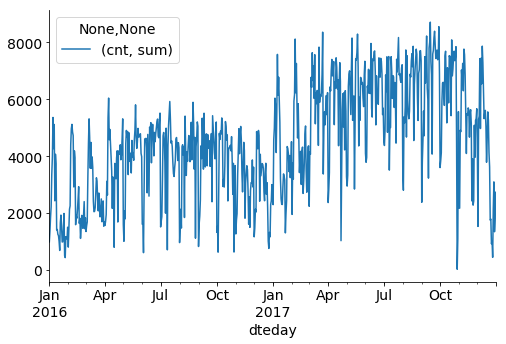

In [14]:
# UTILIZANDO pandas.DataFrame.plot() 

alquileres_por_fecha.plot()

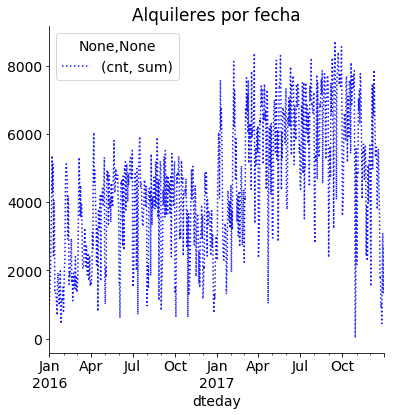

In [15]:
# UTILIZANDO pandas.DataFrame.plot()  podemos enriquecer el gráfico con :
#     figsize=(6,6),
#     style=['b:','ro--'],
#     alpha=0.9, 
#    title='Alquileres por fecha')

alquileres_por_fecha.plot(figsize=(6,6),
     style=['b:','ro--'],
     alpha=0.9, 
     title=('Alquileres por fecha'))

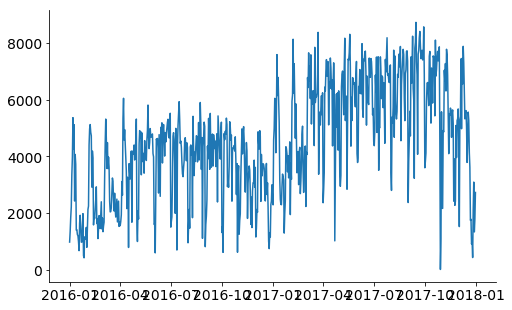

In [16]:
#UTILIZANDO matplotlib : plt.plot(<nombre del dataframe>)

plt.plot(alquileres_por_fecha)


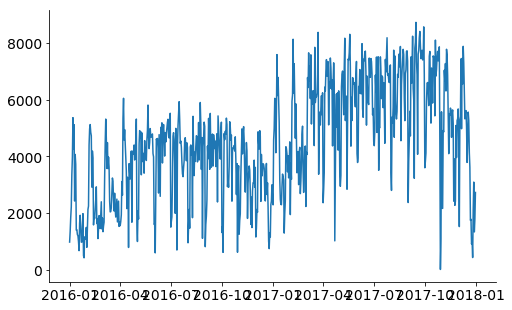

In [17]:
#UTILIZANDO matplotlib plt.plot() personalizamos mucho más

plt.plot(alquileres_por_fecha)
# Ejemplo de los parámetros que podemos aplicar a la legenda. 
#plt.title("Alquileres por fecha")
#plt.legend(loc='down', bbox_to_anchor=(1, 1), prop={'size': 12})

#https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html

## Utilizamos figure 

[Text(0, 0.5, 'Alquileres'),
 Text(0.5, 0, 'Mes'),
 Text(0.5, 1.0, 'Evolución Alquileres Bicicletas')]

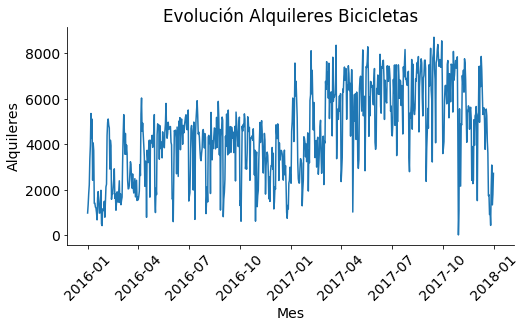

In [18]:
#alquileres_por_fecha
# Utilizamos figure 
#fig,axes = plt.subplots(nrows=1, ncols=2, figsize=(15,7))
#axes = axes[0]
fig,axes = plt.subplots(nrows=1, ncols=1, figsize=(8,4))
#alquileres_por_fecha.plot(kind='bar', ax=axes) #panda
axes.plot(alquileres_por_fecha) #matplotlib
title='Evolución Alquileres Bicicletas'
#axes.set_title(title)
axes.xaxis.set_tick_params(rotation=45)
#axes.get_yaxis().set_ticks([0])
axes.set(title=title, ylabel='Alquileres',xlabel='Mes')



In [20]:
# Repetimos en este código la funcion grouper para verlo mejor, veamos como agrupa los alquileres por fecha
# cambiando la fecha a D,M,Q,Y ...
fecha=pd.Grouper(key='dteday', freq='Q')

campos_filas=[fecha]
campos_columnas=['workingday']
#Opcion1 
#campos_valores=['cnt']
#agregados={np.sum}
#Opcion 2
agregados={'cnt':np.sum }

alquileres_por_fecha_wd=pd.pivot_table(df_datos,
                                    index=campos_filas,
                                    columns=campos_columnas,
 #                                   values=campos_valores, # en caso de utilizar la opción 2 asterisca esta linea
                                    aggfunc=agregados)


In [21]:
alquileres_por_fecha_wd.head()

cnt        
workingday       0       1
dteday                    
2016-03-31   64172  155865
2016-06-30  118891  240726
2016-09-30  101918  262071
2016-12-31  101858  199436
2017-03-31  130840  301564

In [22]:
alquileres_por_fecha_wd.cnt[0]

dteday
2016-03-31     64172
2016-06-30    118891
2016-09-30    101918
2016-12-31    101858
2017-03-31    130840
2017-06-30    169771
2017-09-30    178649
2017-12-31    134170
Freq: Q-DEC, Name: 0, dtype: int64

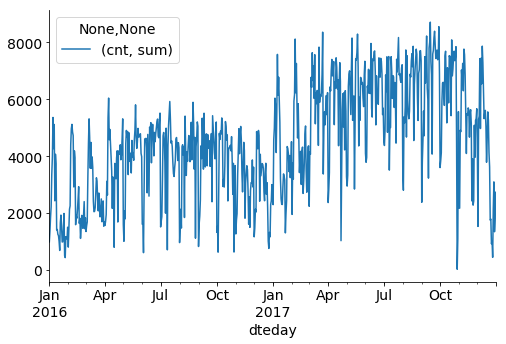

In [26]:
#Alquiler en tipo barras ( utiliza pandas es más sencillo <nombre del dataframe>.plot(kind, stacked...)) 

alquileres_por_fecha.plot( stacked=True)


Creamos también un gráfico de areas ( este gráfico está en matplotlib)

In [21]:
#alquiler formato area ( fill_between) es en matplotlib


# Q1 ¿En qué agregado de fecha queda más intuitiva la información?

Cambia freq='Q' Por freq='M' y repite los gráficos para ver cual es mejor. 

In [141]:
#Haz un gráfico con el agregado de fecha en dia , mes , trimestre que consideres más intuitivo.
# Repetimos en este código la funcion grouper para verlo mejor, veamos como agrupa los alquileres por fecha
# cambiando la fecha a D,M,Q,Y ...

fecha=pd.Grouper(key='dteday', freq='Q')

campos_filas=[fecha]
#campos_columnas=['yr']
campos_valores=['cnt']
agregados={'cnt': np.sum}

alquileres_por_fecha=pd.pivot_table(df_datos,
                                    index=campos_filas,
#                                    columns=campos_columnas,
                                    values=campos_valores,
                                    aggfunc=agregados)



In [142]:
alquileres_por_fecha

,cnt
dteday,
2016-03-31,220037
2016-06-30,359617
2016-09-30,363989
2016-12-31,301294
2017-03-31,432404
2017-06-30,549996
2017-09-30,594936
2017-12-31,470406


In [143]:
# Visualizalo con un gráfico


Si queremos utilizar más de una forma de agregar, añadimos separados por comas.  
#Opcion1   
    agregados={np.sum, np.mean}
#Opcion2  
    agregados={'cnt':[np.sum,np.mean]}

In [144]:
## Crea un gráfico de evolución por trimestres,meses, por semanas y por días. 
##¿Cual es el mejor para estos datos?
## Añade a la tabla pivotada workday y crea el gráfico que mejor se adapte. 


## P2-HISTOGRAMA

In [145]:
# Repetimos en este código la funcion grouper para verlo mejor, veamos como agrupa los alquileres por fecha
# cambiando la fecha a D,M,Q,Y ...
fecha=pd.Grouper(key='dteday', freq='D')

campos_filas=[fecha]
#campos_columnas=['yr']
campos_valores=['cnt','temp']
agregados={np.mean}
#agregados={'cnt':[np.sum,np.mean] }

alquiler_temperatura=pd.pivot_table(df_datos,
                                    index=campos_filas,
#                                    columns=campos_columnas,
                                    values=campos_valores,
                                    aggfunc=agregados)

In [146]:
alquiler_temperatura.head()

,cnt,temp
,mean,mean
dteday,,
2016-01-01,41.041667,0.344167
2016-01-02,59.130435,0.192174
2016-01-03,77.125000,0.266667
2016-01-04,92.791667,0.300000
2016-01-05,139.625000,0.451667


# Q2  Visualizamos el Histograma de alquileres y el Histograma de temperaturas

In [ ]:
utilizamos las figuras para ver los dos histogramas juntos

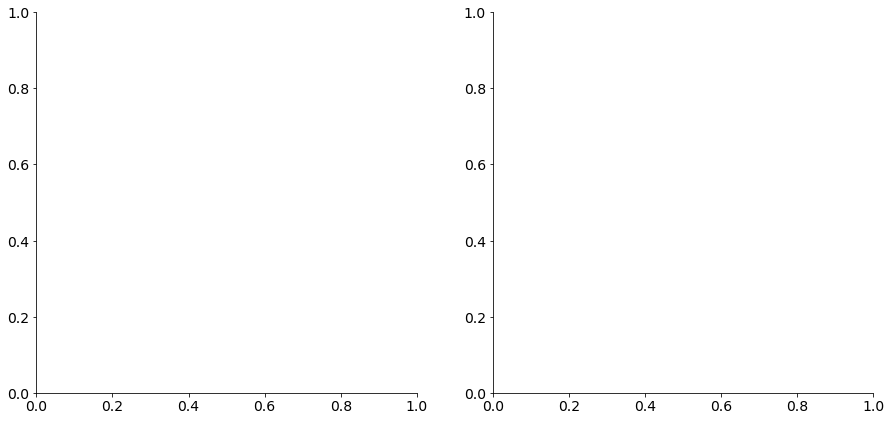

In [22]:
#creamos una figura con dos subplots
fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(15, 7))
# cada celda de la matriz la podemos 
ax0 = axes[0]
#creamos un histograma para alquilers y=cnt , kind='hist',ax=ax0
# si queremos que los os gráficos tengan la misma escala fijamos la escala del primero como la del segundo
ax1 = axes[1]
#creamos un histograma para alquilers y=temp , kind='hist', ax=ax1


In [26]:
#Compara el histograma de cnt , casual por suma y media

# P3 - Alquiler por horas y días

In [23]:
campos_filas=['hr']
campos_columnas=['weekday']
valores=['cnt']
aggregate={'cnt':'mean'}
df_horas_diasemana=pd.pivot_table(df_datos,
                                    index=campos_filas,
                                    columns=campos_columnas,
                                    values=valores,
                                    aggfunc=aggregate)

In [24]:
##Crea el grafico que mejor se adapte, primero visulaiza los datos que tienes 

In [26]:
#¿cual es el gráfico más sencillo para esta visualizacion ?


# P4 Relacion entre cnt y tmp
## P4.1 Utilizando total de meses. 


In [27]:
campos_filas=['mnth']
#campos_columnas=['yr']
campos_valores=['cnt','temp']
agregados={np.mean}
#agregados={'cnt':[np.sum,np.mean] }
relacion_mes=pd.pivot_table(df_datos,
                                    index=campos_filas,
#                                    columns=campos_columnas,
                                    values=campos_valores,
                                    aggfunc=agregados)

Veamos la relación entre temperatura, alquileres y meses ( indepenientemente si ha sido un mes del primer mes o del segundo)

In [28]:
relacion_mes

,cnt,temp
,mean,mean
mnth,,
1,94.424773,0.237649
2,112.865026,0.300209
3,155.410726,0.390903
4,187.260960,0.470021
5,222.907258,0.594798
6,240.515278,0.684097
7,231.819892,0.755470
8,238.097627,0.708705


In [29]:
#grafico ( pandas) tipo scatter kind='scatter', x='temp',y='cnt' 

In [31]:
#UTILIZANDO matplotlib.pyplot.plot() 
#plt.scatter(relacion_mes.temp,relacion_mes.cnt)

## P4.2 Regresion lineal
¿Sabemos calcular una regresion lineal ?  

Utilizamos la funcion np polifit, nos busca el poligono ( en este caso de grado1) que mejor se adapta a estos puntos. el primer valor es la x el segundo la constante. 

In [157]:
#Con las variables temperatura ( temp) y alquileres creamos un array 
#( utilizamos .:,0 para quitar los dobles corchetes)
# ya que sino lo traduce como un array de dos dimensiones. 

x1 =np.array(relacion_mes.temp)[:,0]
y1 =np.array(relacion_mes.cnt)[:,0]

x1

array([0.23764871, 0.3002088 , 0.39090292, 0.47002088, 0.59479839,
       0.68409722, 0.75547043, 0.70870508, 0.61650661, 0.48718125,
       0.36919972, 0.32416723])

In [158]:
l_model1 = np.polyfit(x1,y1, 1)
# l_model1, para un grado, nos devuelve dos valores, la inclinación y la constante Y=mx+c 
# m es el primer valor que nos devuelve y c el segudon
l_model1

array([277.73078516,  51.37122331])

¿Que valores devuelve l_model1 si utilizamos 2 grados?

La función zip() toma como argumento dos o más objetos iterables (idealmente cada uno de ellos con la misma cantidad de elementos) y retorna un nuevo iterable cuyos elementos son tuplas que contienen un elemento de cada uno de los iteradores originales.
* **Ejemplo**  
>>> paises = ["China", "India", "Estados Unidos", "Indonesia"]  
>>> poblaciones = [1391, 1364, 327, 264]  
>>> list(zip(paises, poblaciones)) 
[('China', 1391), ('India', 1364), ('Estados Unidos', 327), ('Indonesia', 264)]

In [159]:
r_x, r_y1 =zip(*((i, i*l_model1[0] + l_model1[1]) for i in x1))

In [160]:
r_x,r_y1

((0.23764870538838354,
  0.30020879940343015,
  0.39090291921249226,
  0.47002087682672206,
  0.5947983870967741,
  0.6840972222222225,
  0.7554704301075269,
  0.7087050847457648,
  0.6165066109951299,
  0.4871812543073718,
  0.36919972164230913,
  0.3241672285906938),
 (117.37358485399031,
  134.74844888472683,
  159.93699798906127,
  181.91049047783838,
  216.5650463759569,
  241.36608196958395,
  261.1886190352474,
  248.20044294945666,
  222.59408844376458,
  186.67645558925096,
  153.9093518873235,
  141.40244223420316))

In [161]:
# unimos el grafico scatter y el gráfico de lineas
#( un plot debajo de otro)

In [32]:

#UTILIZANDO matplotlib.pyplot.plot() 
#plt.scatter(relacion_mes.temp,relacion_mes.cnt)

In [33]:
# Repetimos en este código la funcion grouper para verlo mejor, veamos como agrupa los alquileres por fecha
# cambiando la fecha a D,M,Q,Y ...
fecha=pd.Grouper(key='dteday', freq='d')

campos_filas=[fecha]
#campos_columnas=['yr']
campos_valores=['cnt','temp']
agregados={'cnt':np.mean,'temp':np.mean }


relacion_temp_cnt=pd.pivot_table(df_datos,
                                    index=campos_filas,
#                                    columns=campos_columnas,
                                    values=campos_valores,
                                    aggfunc=agregados)

In [34]:
relacion_temp_cnt.head()

,cnt,temp
dteday,,
2016-01-01,41.041667,0.344167
2016-01-02,59.130435,0.192174
2016-01-03,77.125000,0.266667
2016-01-04,92.791667,0.300000
2016-01-05,139.625000,0.451667


In [35]:
#Q2 ¿Influye en la regresión el año ?

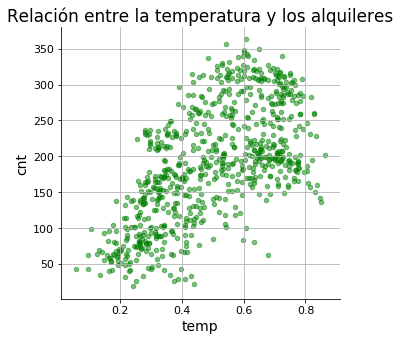

In [36]:
relacion_temp_cnt.plot(kind='scatter',
                     x='temp',
                     y='cnt',
                     title='Relación entre la temperatura y los alquileres',
                     color='g',
                     grid=True,
                     alpha=0.50,
                     figsize=(5,5),
                     fontsize=11)

#UTILIZANDO matplotlib.pyplot.plot() 
#plt.scatter(alquiler_temperatura.temp,relacion_mes.cnt)

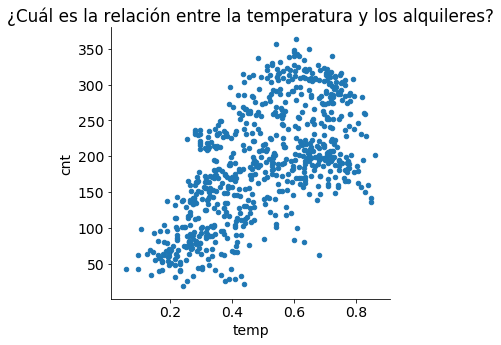

In [37]:
# UTILIZANDO pandas.DataFrame.plot() 
relacion_temp_cnt.plot(kind='scatter',
                     x='temp',
                     y='cnt',
                     figsize=(5,5),
                     title='¿Cuál es la relación entre la temperatura y los alquileres?')


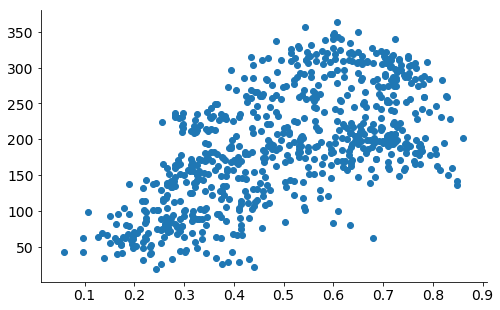

In [38]:
#UTILIZANDO matplotlib.pyplot.plot() 
plt.scatter(relacion_temp_cnt.temp,relacion_temp_cnt.cnt)

¿Vemos relación entre el alquiler diario y la temperatura?
¿Que pasa si agrupamos por alquiler mensual? ¿Cómo agrupamos?

In [39]:
# Repetimos en este código la funcion grouper para verlo mejor, veamos como agrupa los alquileres por fecha
# cambiando la fecha a D,M,Q,Y ...
fecha=pd.Grouper(key='dteday', freq='M')

campos_filas=[fecha]
#campos_columnas=['yr']
campos_valores=['cnt','temp','yr']
agregados={'cnt':np.mean,'temp':np.mean,'yr':np.mean }


alquiler_temperatura=pd.pivot_table(df_datos,
                                    index=campos_filas,
#                                    columns=campos_columnas,
                                    values=campos_valores,
                                    aggfunc=agregados)

In [40]:
alquiler_temperatura.head()

,cnt,temp,yr
dteday,,,
2016-01-31,88.773639,0.302894,0
2016-02-29,108.393805,0.398024,0
2016-03-31,115.549180,0.387596,0
2016-04-30,150.320334,0.493565,0
2016-05-31,169.511440,0.564361,0


In [43]:
# UTILIZANDO pandas.DataFrame.plot() 


In [173]:
#Nos interesaa tener el año para poder utilizarlo de colore
c=alquiler_temperatura.yr
c


dteday
2016-01-31    0
2016-02-29    0
2016-03-31    0
2016-04-30    0
2016-05-31    0
2016-06-30    0
2016-07-31    0
2016-08-31    0
2016-09-30    0
2016-10-31    0
2016-11-30    0
2016-12-31    0
2017-01-31    1
2017-02-28    1
2017-03-31    1
2017-04-30    1
2017-05-31    1
2017-06-30    1
2017-07-31    1
2017-08-31    1
2017-09-30    1
2017-10-31    1
2017-11-30    1
2017-12-31    1
Freq: M, Name: yr, dtype: int64

In [42]:
#UTILIZANDO matplotlib.pyplot.plot() 



# P5-Parte de un todo

In [175]:
## Crea la pivot table : Alquileres por estación y dia laboral y el gráfico que mejor se adapte. 
campos_filas=['season']
campos_columnas=['workingday']
campos_valores=['cnt']
agregados={'cnt':np.sum }


season_workingday=pd.pivot_table(df_datos,
                                    index=campos_filas,
                                 columns=campos_columnas,
                                    values=campos_valores,
                                    aggfunc=agregados)


In [176]:
season_workingday.head()

cnt        
workingday       0       1
season                    
1           137683  333665
2           287976  630613
3           312056  749073
4           262554  579059